In [2]:
pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 41.0 MB/s eta 0:00:00


In [3]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Introdução

"$nside$" é um parâmetro crucial no sistema de pixelização HEALPix. Ele define a resolução do mapa HEALPix, determinando o número total de pixels na esfera. Quanto maior o valor de nside, maior será a resolução do mapa e, consequentemente, o número de pixels.

Especificamente, o número de pixels npix em um mapa HEALPix é dado pela fórmula:\
\
$npix=12×nside^
2$

In [4]:
# nsie define a resolução do mapa HEALPix
nside = 16
# a função nside2npix exibe o número de pixels
npix = hp.nside2npix(nside)
npix

3072

In [5]:
# Criando um mapa com valores aleatórios
m = np.random.rand(npix)
m

array([0.51116663, 0.51778162, 0.17843724, ..., 0.29741152, 0.25322399,
       0.38991724])

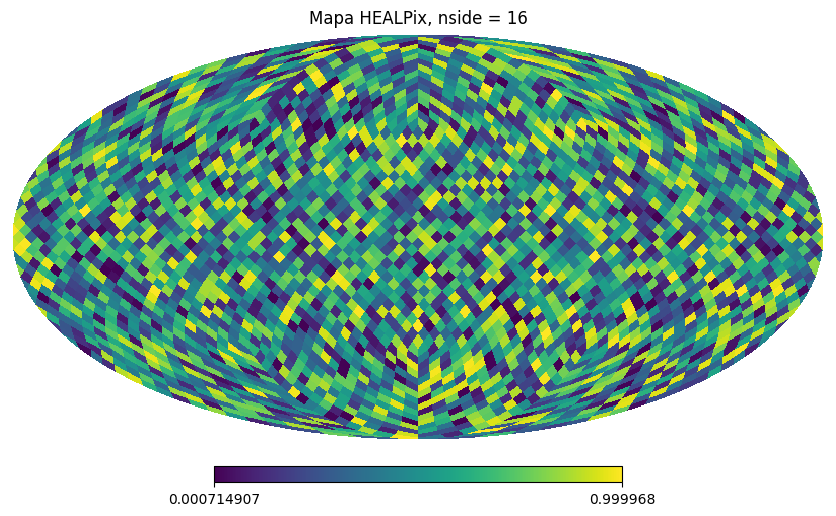

In [6]:
# Plotando o mapa
hp.mollview(m, title=f"Mapa HEALPix, nside = {nside}")
plt.show()

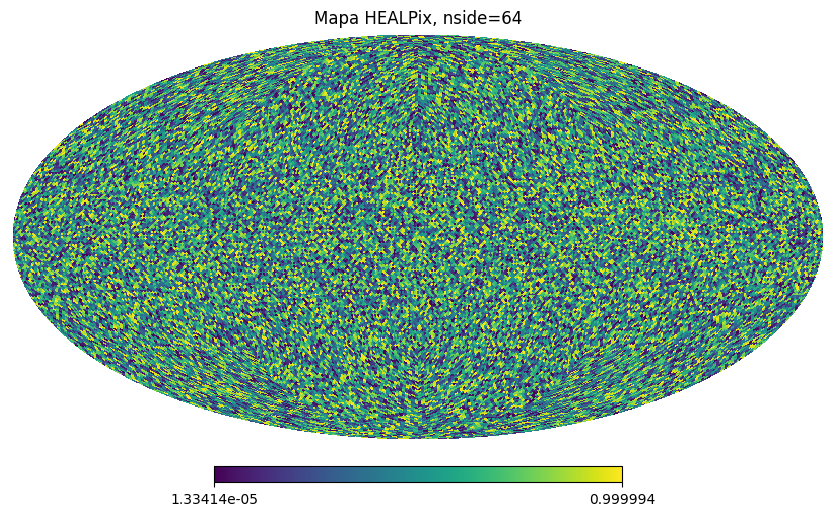

In [7]:
# Mapa com nside=64

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Número de pixels
nside = 64
npix = hp.nside2npix(nside)

# Criando um mapa com valores aleatórios
m = np.random.rand(npix)

# Plotando o mapa
hp.mollview(m, title=f"Mapa HEALPix, nside={nside}")
plt.show()

# Visualização de mapas

healpy.mollview(): Exibe um mapa HEALPix usando a projeção Mollweide.

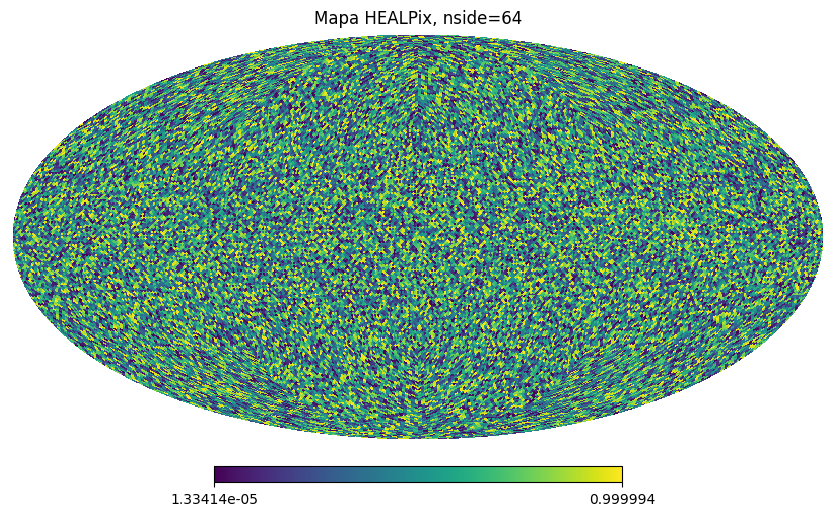

In [8]:
# Plotando o mapa
hp.mollview(m, title=f"Mapa HEALPix, nside={nside}")
plt.show()

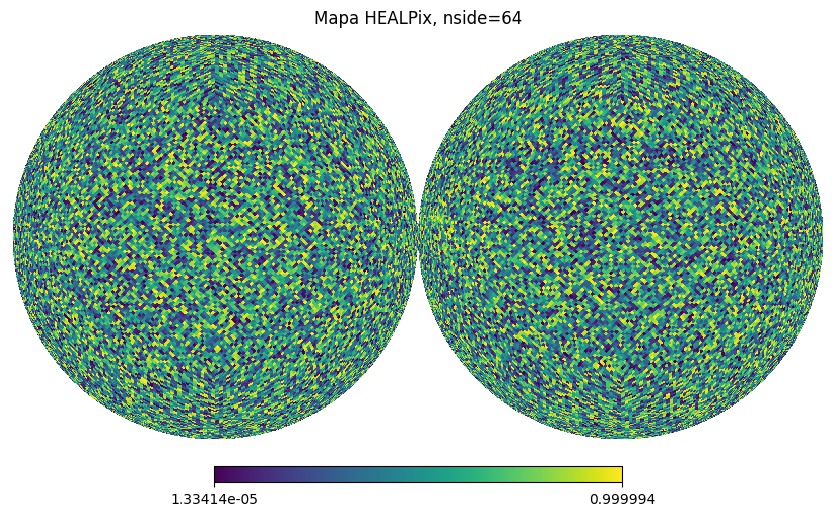

In [9]:
hp.orthview(m, title=f"Mapa HEALPix, nside={nside}")
plt.show()

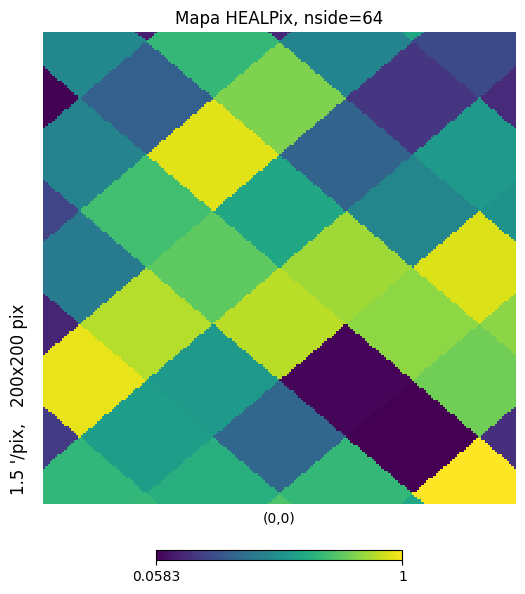

In [10]:
hp.gnomview(m, title=f"Mapa HEALPix, nside={nside}")
plt.show()

# Lendo um arquivo

# Mapa de densidade fontes e Máscara

leia um arquivo que contenhas as coordenadas

In [11]:
ra = np.array(np.random.uniform(0,360,10_000))
dec = np.array(np.random.uniform(-90,90,10_000))

In [12]:
# Convertendo ra e dec para ângulos theta e phi em radianos
phi = np.radians(ra)
theta = np.radians(90.0 - dec)

In [13]:
# Definindo o NSIDE e calculando o número de pixels
nside = 64
npix = hp.nside2npix(nside)
npix

49152

**função hp.ang2pix**: converte as coordenadas angulares (theta, phi) em índices de pixels do mapa HEALPix.

In [14]:
# Convertendo (theta, phi) para índices de pixel HEALPix
pix_indices = hp.ang2pix(nside, theta, phi)
pix_indices

array([24659,   291, 48340, ..., 43302, 28784,  2870])

**pix_indices:** é um array que contém os índices dos pixels onde as fontes estão localizadas. Esses índices são calculados anteriormente no código usando a função hp.ang2pix, que converte as coordenadas angulares (theta, phi) em índices de pixels do mapa HEALPix.
Exemplo: Se pix_indices = [10, 45, 45, 89], isso significa que há fontes nos pixels 10, 45, e 89 do mapa HEALPix, e o pixel 45 contém duas fontes.

In [15]:
# Contando o número de fontes em cada pixel
density_map = np.bincount(pix_indices, minlength=npix)
density_map

array([13, 12, 16, ..., 14, 17, 20])

In [16]:
type(density_map[0])

numpy.int64

Essa linha de código está criando o mapa de densidade de fontes em cada pixel do mapa Healpix. O objetivo é contar quantas fontes (ou ocorrências) existem em cada pixel. Cada índice de pixel representa uma área específica no céu.


https://numpy.org/doc/stable/reference/generated/numpy.bincount.html

**np.bincount()** é uma função do NumPy que conta o número de ocorrências de cada valor em um array de inteiros. Basicamente, ela conta quantas vezes cada índice de pixel aparece no array pix_indices.
minlength=npix garante que o array de saída tenha exatamente npix elementos (onde npix é o número total de pixels no mapa HEALPix, determinado pelo nside escolhido). Se um pixel não tiver fontes, seu valor será zero.
Resultado: A função retorna um array density_map onde o valor de cada elemento (correspondente a um pixel) é o número de fontes contadas naquele pixel.
Exemplo Simplificado:
Vamos considerar um exemplo simples para entender:

Suponha que pix_indices = [2, 3, 3, 3, 4] e npix = 6.
Então, o código np.bincount(pix_indices, minlength=npix) faz o seguinte:

Conta o número de vezes que cada índice aparece:
Pixel 0: 0 vezes
Pixel 1: 0 vezes
Pixel 2: 1 vez
Pixel 3: 3 vezes
Pixel 4: 1 vez
Pixel 5: 0 vezes

Isso resulta no array: density_map = [0, 0, 1, 3, 1, 0]

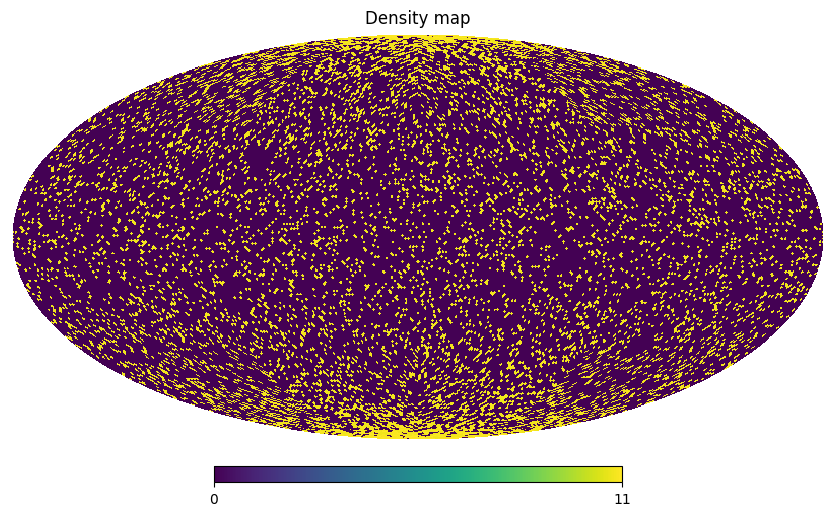

In [17]:
hp.mollview(density_map, title='Density map',
            norm='hist')
plt.show()

## Criando uma mascára

In [18]:
# Convertendo density_map para float64 para suportar hp.UNSEEN
density_map = density_map.astype(np.float64)

**Objetivo:** Converte os valores do array density_map para o tipo de dados float64.

**Motivo da conversão:**
Inicialmente, density_map pode estar em um tipo de dado inteiro (por exemplo, int32 ou int64) porque ele contém contagens de fontes em cada pixel.

Para usar valores especiais como hp.UNSEEN (um valor especial usado no Healpy para marcar pixels como "invisíveis") ou np.nan, o array precisa ser de um tipo de dado que suporte números de ponto flutuante, como float64.
float64 é um tipo de dado que permite representar números de ponto flutuante com alta precisão, incluindo valores como np.nan.

In [19]:
type(hp.UNSEEN), hp.UNSEEN

(float, -1.6375e+30)

In [20]:
# Criando a máscara para os pixels onde não há fontes (valor zero)
mask = density_map > 0
mask

array([ True,  True,  True, ...,  True,  True,  True])

**Objetivo:** Criar uma máscara booleana (um array de True e False) que identifica quais pixels no density_map contêm pelo menos uma fonte.

Cada elemento de density_map é comparado com 0. Se o valor de um pixel for maior que 0, ele será marcado como True na máscara, indicando que há fontes nesse pixel. Se o valor for 0, será marcado como False, indicando que o pixel está vazio (sem fontes).

**Exemplo:**
Suponha que **density_map = [2.0, 0.0, 5.0]**.
A expressão **density_map > 0** geraria **mask = [True, False, True]**.

In [21]:
~mask

array([False, False, False, ..., False, False, False])

In [22]:
masked_map = np.copy(density_map)
masked_map[~mask] = hp.UNSEEN

**Objetivo:** Criar uma cópia exata de density_map que será usada para aplicar a máscara. Fazer uma cópia garante que density_map original permaneça inalterado enquanto modificações são feitas em masked_map.
Isso é útil porque masked_map será alterado para refletir a aplicação da máscara.

O operador ~ inverte os valores do array booleano mask. Onde mask é True, ~mask será False, e vice-versa. Isso significa que estamos identificando os pixels onde não há fontes (**density_map == 0**)

**masked_map[~mask]**: Esta expressão seleciona todos os elementos de **masked_map** onde **~mask** é True. Suponha que **masked_map = [3.0, 0.0, 5.0]** e **mask = [True, False, True]**. Então **~mask = [False, True, False]**.
**masked_map[~mask]** selecionaria o segundo elemento (0.0).

Quando você faz **masked_map[~mask] = hp.UNSEEN**, você está substituindo todos os elementos selecionados (os que correspondem a True em ~mask, ou seja, onde density_map era 0) pelo valor especial **hp.UNSEEN**.

**hp.UNSEEN** é um valor especial em Healpy que sinaliza que um pixel deve ser ignorado ou não mostrado durante a visualização.
Ao usar **hp.UNSEEN**, você assegura que esses pixels "vazios" não serão representados graficamente e não influenciarão outras operações que possam considerar todos os valores no mapa.
É uma maneira eficaz de tratar pixels sem dados sem influenciar a interpretação do mapa.


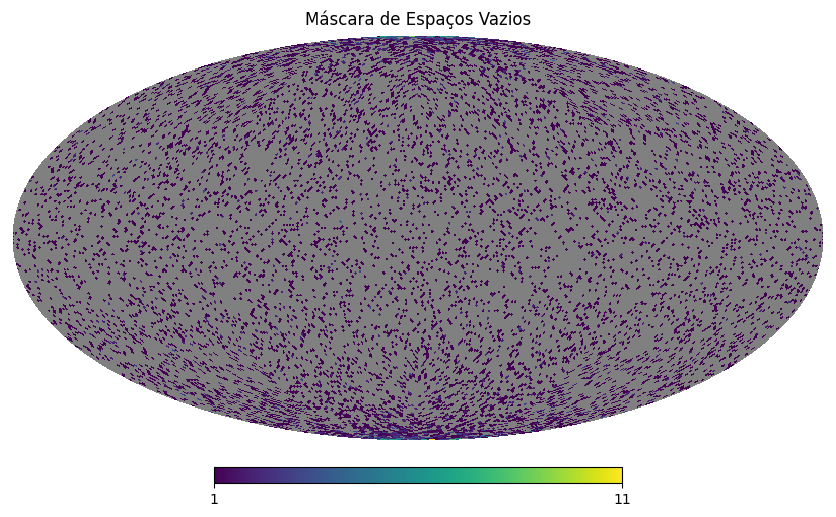

In [23]:
# Visualizando máscara
hp.mollview(masked_map,
            title="Máscara de Espaços Vazios")
plt.show()

# Coordenadas no céu

O healpy só entende as coordenadas na forma esférica ou em vetores

In [96]:
ra = np.array(np.random.uniform(0,360,10_000))    # em graus(degree)
dec = np.array(np.random.uniform(-90,90,10_000))  # em graus(degree)

ra, dec

(array([354.94906894, 270.65616545, 288.40447805, ..., 291.98762386,
        233.06763925, 313.83085652]),
 array([-5.84714433e+01,  7.86205951e+01,  4.43918712e+01, ...,
         2.71113332e-02,  8.46930624e+01, -7.42714191e+01]))

É preciso em muitas vezes converter as coordenadas ICRS para sua forma esférica

In [97]:
# Convertendo ra e dec para ângulos theta e phi em radianos
phi = np.radians(ra)
theta = np.radians(90.0 - dec)

phi, theta

(array([6.19502993, 4.72384123, 5.03360772, ..., 5.09614541, 4.06779768,
        5.47738174]),
 array([2.59131553, 0.19860808, 0.79601201, ..., 1.57032314, 0.09262353,
        2.86707713]))

In [98]:
# invertendo a operação
ra = np.degrees(phi)
dec = 90 - np.degrees(theta)

ra, dec

(array([354.94906894, 270.65616545, 288.40447805, ..., 291.98762386,
        233.06763925, 313.83085652]),
 array([-5.84714433e+01,  7.86205951e+01,  4.43918712e+01, ...,
         2.71113332e-02,  8.46930624e+01, -7.42714191e+01]))

## Obtendo coordenadas dos pixels

In [135]:
# Definindo o NSIDE (resolução do mapa)
nside = 16

# calculando o número de pixels
npix = hp.nside2npix(nside)
npix

3072

In [136]:
# Criando um array cujos os elementos são os indices dos pixels
np.arange(npix)

array([   0,    1,    2, ..., 3069, 3070, 3071])

In [137]:
# Obtendo os angulos em coordenadas esféricas padrão em radianos
theta, phi = hp.pix2ang(nside, np.arange(npix))
theta, phi

(array([0.05103658, 0.05103658, 0.05103658, ..., 3.09055608, 3.09055608,
        3.09055608]),
 array([0.78539816, 2.35619449, 3.92699082, ..., 2.35619449, 3.92699082,
        5.49778714]))

In [138]:
# Convertendo theta e phi p/ ra e dec
ra = np.degrees(phi)
dec = 90 - np.degrees(theta)

ra, dec

(array([ 45., 135., 225., ..., 135., 225., 315.]),
 array([ 87.07581964,  87.07581964,  87.07581964, ..., -87.07581964,
        -87.07581964, -87.07581964]))

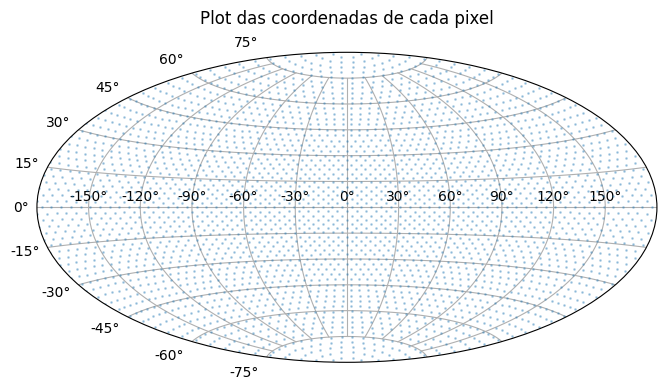

In [139]:
from astropy.coordinates import SkyCoord as SkyCoord
from astropy import units as u

c = SkyCoord(ra ,dec, frame='icrs',unit='deg')

ra = c.ra.wrap_at(180 * u.deg).radian
dec = c.dec.radian

l = c.galactic.l.wrap_at(180 * u.deg).radian
b = c.galactic.b.radian

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Plot das coordenadas de cada pixel\n")
plt.grid(True)
plt.plot(ra,dec,'.', markersize=2, alpha=0.3)
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.show()

# Dipolo

In [25]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Definir o valor de nside para o mapa
nside = 64  # Resolução do mapa
npix = hp.nside2npix(nside)  # Número de pixels no mapa

# Criar um mapa de temperatura aleatório
# Temperaturas aleatórias em torno de um valor médio com flutuações pequenas
mean_temp = 2.725  # Temperatura média do CMB em Kelvin
temp_fluctuations = np.random.normal(loc=0, scale=0.001, size=npix)  # Flutuações pequenas
temperature_map = mean_temp + temp_fluctuations

Amplitude do Dipolo: 2.7250011364282316
Direção do Dipolo (vetor): [-1.21833573e-05 -1.84733128e-07 -5.69551197e-06]
Coordenadas do Dipolo - theta: [115.0527614] graus, phi: [180.86869467] graus




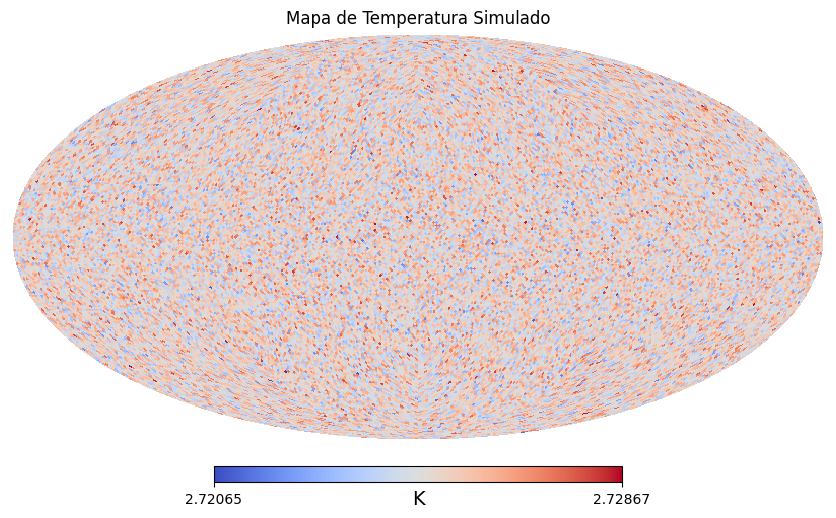

In [26]:
# Ajustar um dipolo ao mapa de temperatura
amp, vec = hp.fit_dipole(temperature_map)

# Exibir os resultados do ajuste do dipolo
print("Amplitude do Dipolo:", amp)
print("Direção do Dipolo (vetor):", vec)

# Converter a direção do vetor para coordenadas angulares (theta, phi)
theta, phi = hp.vec2ang(vec)
print("Coordenadas do Dipolo - theta:", np.degrees(theta), "graus, phi:", np.degrees(phi), "graus")

print('\n')

# Visualizar o mapa de temperatura
hp.mollview(temperature_map, title="Mapa de Temperatura Simulado", unit="K", cmap='coolwarm')
plt.show()

In [28]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Definir o valor de nside para o mapa
nside = 64  # Resolução do mapa
npix = hp.nside2npix(nside)  # Número de pixels no mapa

# Criar um mapa de temperatura aleatório
mean_temp = 2.725  # Temperatura média do CMB em Kelvin
temp_fluctuations = np.random.normal(loc=0, scale=0.001, size=npix)  # Flutuações pequenas
temperature_map = mean_temp + temp_fluctuations

# Ajustar um dipolo ao mapa de temperatura
amp, vec = hp.fit_dipole(temperature_map)

# Exibir os resultados do ajuste do dipolo
print("Amplitude do Dipolo:", amp)
print("Direção do Dipolo (vetor):", vec)

# Criar o mapa de dipolo
dipole_map = hp.pixelfunc.remove_dipole(temperature_map, nest=False, fitval=[amp, vec])

# Subtrair o dipolo ajustado do mapa original para criar o mapa do dipolo
dipole_only_map = temperature_map - dipole_map

# Visualizar o mapa do dipolo
hp.mollview(dipole_only_map, title="Mapa de Dipolo Ajustado", unit="K", cmap='coolwarm')
plt.show()

Amplitude do Dipolo: 2.7250050982732064
Direção do Dipolo (vetor): [ 1.49455249e-05  1.62357490e-05 -6.47314445e-06]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.